## shmlast vs. crb-blast performance comparison

Simple demonstration of shmlast performance as compared to crb-blast. The performance difference is almost entirely due to LAST.

**Query transcripts**: [Fission yeast reference cDNA](ftp://ftp.ebi.ac.uk/pub/databases/pombase/FASTA/cdna_nointrons_utrs.fa.gz)

**Target proteins**: [Nematostella vectensis reference proteome](ftp://ftp.ebi.ac.uk/pub/databases/reference_proteomes/QfO/Eukaryota/UP000001593_45351.fasta.gz)

In [86]:
!curl -L ftp://ftp.ebi.ac.uk/pub/databases/pombase/FASTA/cdna_nointrons_utrs.fa.gz | gunzip -c > sacPom.cdna.fa
!curl -L ftp://ftp.ebi.ac.uk/pub/databases/reference_proteomes/QfO/Eukaryota/UP000001593_45351.fasta.gz | gunzip -c > Nematostella_vectensis.uniprot.pep.fa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3514k  100 3514k    0     0   897k      0  0:00:03  0:00:03 --:--:--  897k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4941k  100 4941k    0     0  1239k      0  0:00:03  0:00:03 --:--:-- 1239k


In [88]:
# assumes crb-blast and shmlast are installed
# takes a while!
# writes results to results.csv
#!. performance.sh

In [89]:
import pandas as pd
import seaborn as sns
import glob
import ficus

In [90]:
sns.set_style('ticks')

In [64]:
data = pd.read_csv('results.csv', names=['program', 'threads', 'rep', 'time'], skiprows=1, 
                   converters={'time': lambda s: pd.to_timedelta('00:{0}'.format(s.strip()) if s.count(':') == 1 else s, )})
data.time = data.time.astype('timedelta64[s]')

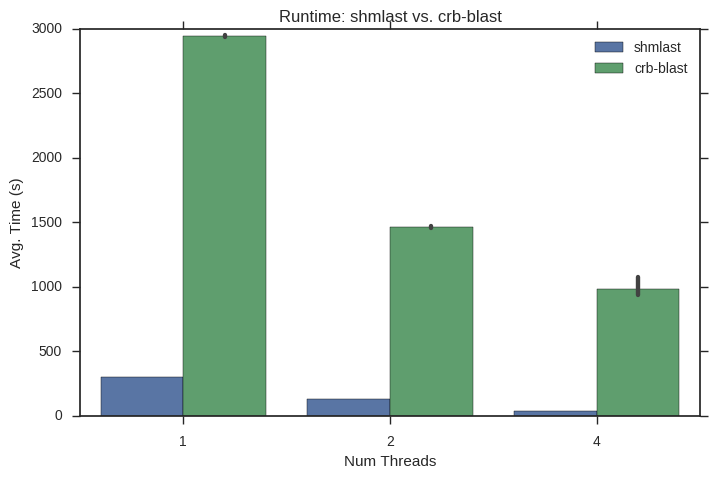

In [101]:
with ficus.FigureManager(show=True, figsize=(8,5), filename='results.pdf') as (fig, ax):
    sns.barplot(x='threads', y='time', hue='program', data=data, ax=ax, )
    ax.legend_.set_title('')
    ax.set(xlabel='Num Threads', ylabel='Avg. Time (s)', title='Runtime: shmlast vs. crb-blast')